In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
from IPython.display import Image
import os
path = os.getcwdu()

# How to set up Spark on your Mac?

In this markdown, I am going to show you how to install the spark on your mac and how to do some simple projects by the use of pyspark. <br>
Here are the softwares that we will install one by one: <br>
1. JAVA JDK 8
2. HADOOP
3. Scala
4. Spark
5. pyspark

# 1. JAVA JDK 8

For now, as far as I know, spark doesn't support JDK 11 so we need to install JDK 8, here is the [link](https://www.oracle.com/technetwork/java/javase/downloads/index.html). So first you will see this page.

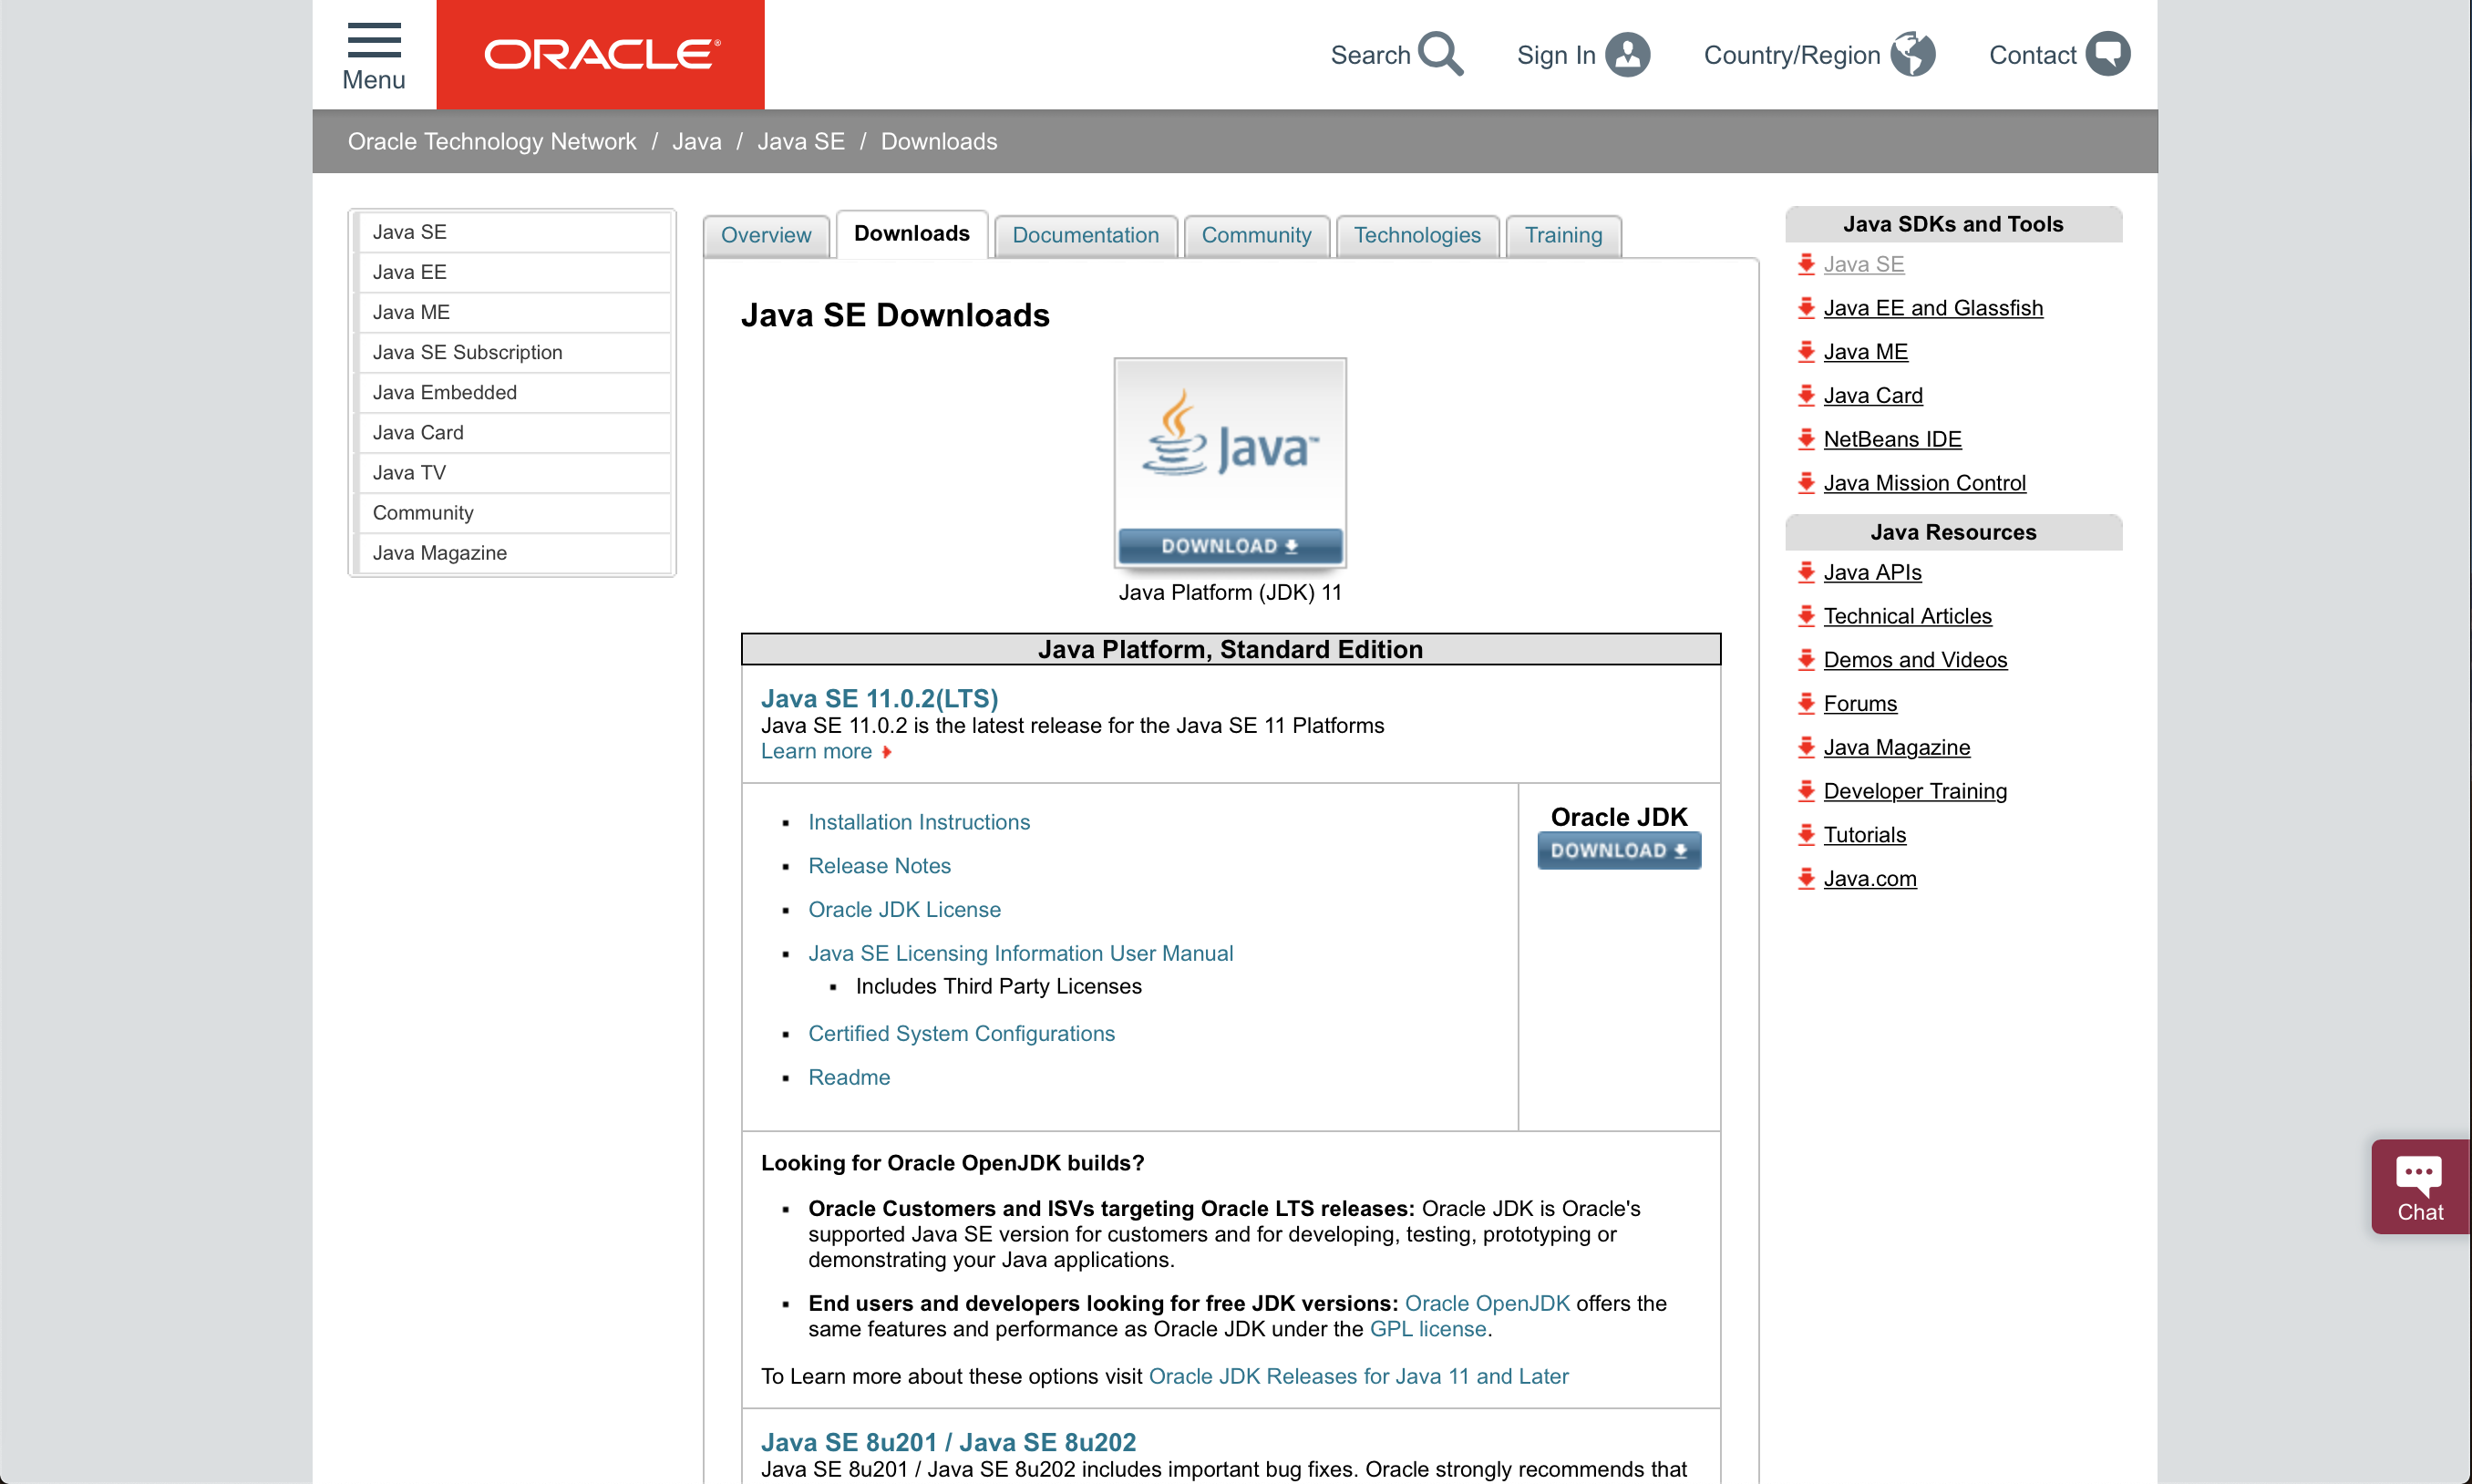

In [15]:
Image(filename = path + '/img/JDK/JDK8_1.png', width = 700)

From the page we can see the link at the top is for JDK 11, to find JDK 8, you need to scoll down to find the section below and click that button.

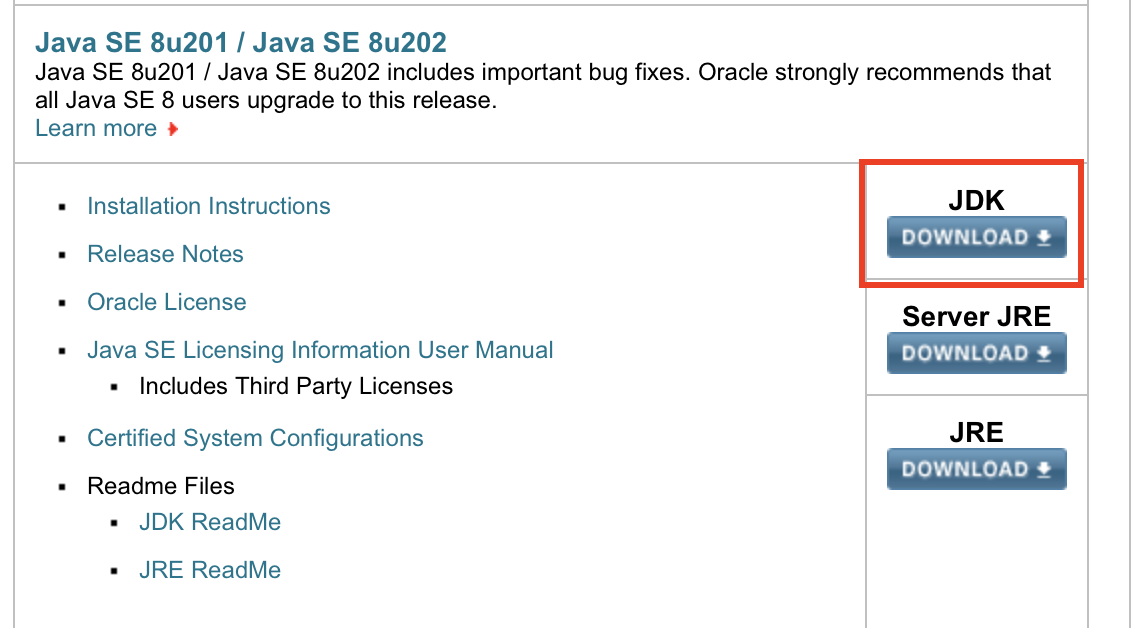

In [16]:
Image(filename = path + '/img/JDK/JDK8_2.png', width = 700)

After clicking that button, you will direct to the download page. Find this widown, first click __Accept License Agreement__ and then click the right version for your operation system to download, for mac, click the link in the red frame. Then your browser should start downloading. 

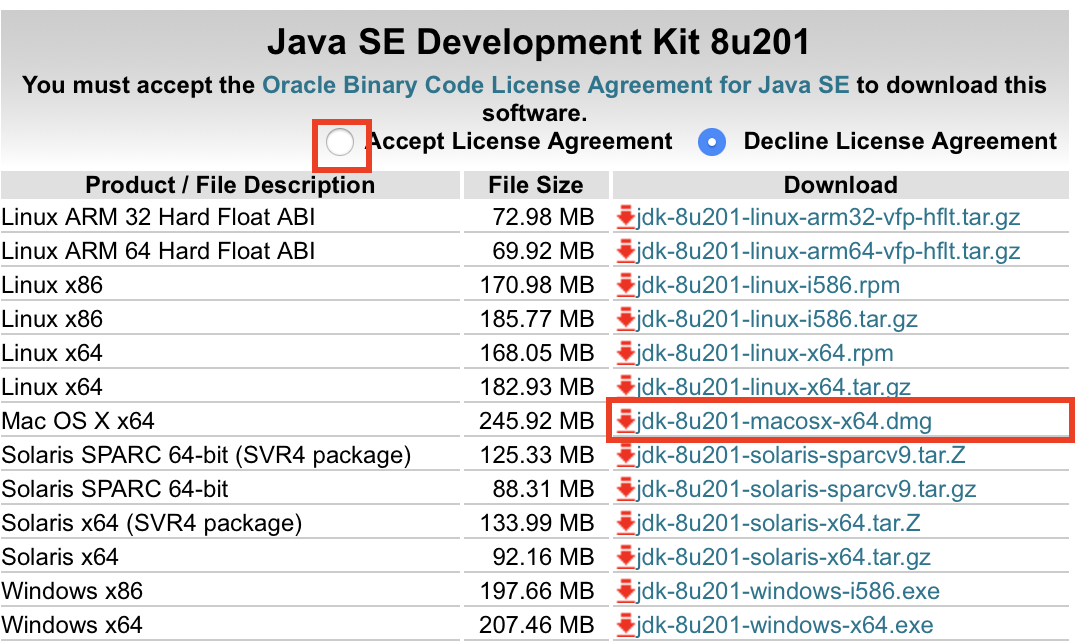

In [18]:
Image(filename = path + '/img/JDK/JDK8_3.png', width = 700)

Open the file you downloaded and install it as other softwares you have installed.

The next step is to set the environment variables. Open your terminal and open the `.bash_profile`, here is the command to open it:`open .bash_profile`, then add the sentences below to the file you just opened.
```
# Setting PATH for java
JAVA_HOME=/Library/Java/JavaVirtualMachines/jdk1.8.0_40.jdk/Contents/Home
PATH=$JAVA_HOME/bin:$PATH:.
```
Save and close the file, type `source .bash_profile` or `. .bash_profile` in your terminal to reexecutes the newly modified initialization document, which is the `.bash_profile` file. <br>
To check if you installed java successfully or not, type `java -version` in your terminal and it should pop out the information below.

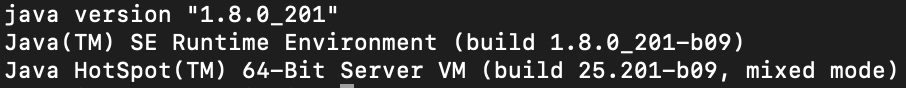

In [19]:
Image(filename = path + '/img/JDK/JDK8_4.png', width = 700)

# 2. Hadoop

Use this [link](http://www.apache.org/dyn/closer.cgi/hadoop/common/hadoop-2.7.3/hadoop-2.7.3.tar.gz) to downloud the hadoop. <br>
Then set your mac environment up to run the hadoop. First, go to your `System Preferences -> Sharing`, check the option of `Remote Login` and make the `Allow access for` to all users, like the image below. 

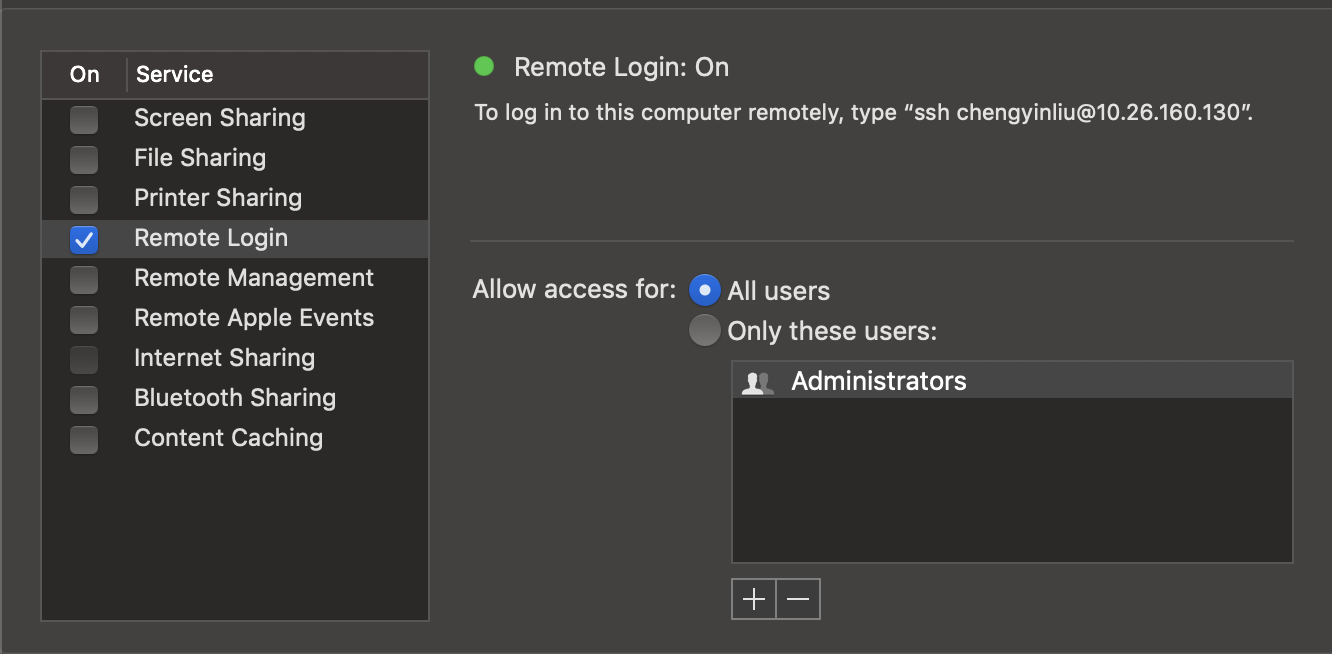

In [21]:
Image(filename = path + '/img/Hadoop/Hadoop_1.png', width = 700)

Unzip the hadoop file to wherever you want, I personaly prefer to put it under my default path. Open the `.bash_profile` again and put the commands to the file.
```
# Setting PATH for HADOOP
export HADOOP_HOME=/Users/hadoop/hadoop-1.2.1 (according to your hadoop directoray)
export PATH=$PATH:$HADOOP_HOME/bin
```
Source the .bash_profile and type `hadoop version` in the terminal to check if we have hadoop installed.

After setting up the environment variables for the system, the next step is to collocate the files under hadoop.

1. hadoop-env.sh

This file is under the path of `{your hadoop dir}/etc/hadoop/`. First, find the variable "JAVA_HOME", change its value to your java home directory, and then add a variable called "HADOOP_PREFIX", and asign your hadoop distribution directory to it. For me, they are:
```
export JAVA_HOME=/Library/Java/JavaVirtualMachines/jdk1.8.0_40.jdk/Contents/Home
export HADOOP_PREFIX=/Users/chengyinliu/spark/hadoop-2.7.3/
```

2. core-site.xml

In the same file, put the sentences below between `<configuration>` and `<\/configuration>`

```
<property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:9000</value>
</property>
```

3. hdfs-site.xml

Same, put the sentences below between `<configuration>` and `<\/configuration>`

```
<property>
    <name>dfs.replication</name>
    <value>1</value>
</property>
```

4. mapred-site.xml (it has a template named: mapred-site.xml.template, you can copy and use the template)

```
<property>
    <name>mapreduce.framework.name</name>
    <value>yarn</value>
</property>
```

5. yarn-site.xml

```
<property>
    <name>yarn.nodemanager.aux-services</name> <value>mapreduce_shuffle</value>
</property>
```

Then install HDFS

Under this dir: `hadoop-2.7.3/bin/`, run `hadoop namenode -format`

To check if the hadoop is intalled correctly:
```
$HADOOP_HOME/sbin/start_dfs.sh
$HADOOP_HOME/sbin/start_yarn.sh
```
They are going to ask your laptop passwork couple of times, after they are both executed, visit `localhost:50070` and `localhost:8088` to test if they are working or not. <br>
If you do not want to enter password everytime you launch hadoop (and spark later), execute the commands below:
```
ssh-keygen -t rsa -P ""
cat $HOME/.ssh/id_rsa.pub >> $HOME/.ssh/authorized_keys
ssh localhost
```

# 3. Scala

For scala, you can use homwbrew to install it. And the environment variables are:
```
export SCALA_HOME=/usr/local/scala
export PATH=$PATH:$SCALA_HOME/bin
```
Write the lines above into `.bash_profile` and source it.

# 4. Spark

Download Spark from this [link](https://spark.apache.org/downloads.html). If the hadoop version you installed is 2.7, then the package type on the download page should also be 2.7. After download it and unzip it, move the spark file to wherever you want, I prefer to put it under my default path. Then we will set the environment variables.
In the `.bash_profile`, we need to write the lines below and source it:
```
# Setting up PATH for Spark
export SPARK_HOME={your spark path}
export PATH=$PATH:$SPARK_HOME/bin

```
Then, we go to the `conf` file in spark, write the lines into the `spark-env.sh` below:
```
export SCALA_HOME={your scala path}
export SPARK_MASTER_IP=localhost
export SPARK_WORKER_MEMORY=4g
```
<br>
Finally, we are ready to go, type `spark-shell` and you should see the image below:

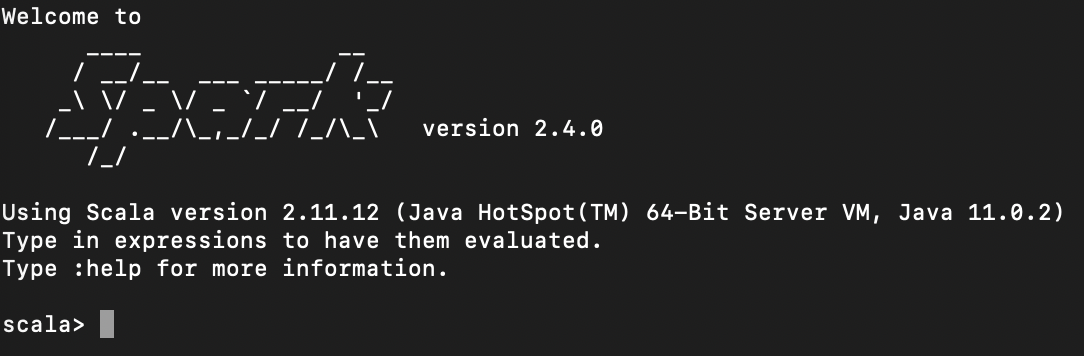

In [5]:
Image(filename = path + '/img/spark/spark_1.png', width = 700)

From here, you can write scala to do run Spark in local.

If we want to run our Spark through API for Python on jupyter notebook, add the lines below into `.bash_profile` and type pyspark in the terminal to launch a jupyter notebook where you can run pyspark.

```
# Setting up PATH for pyspark
export PYSPARK_DRIVER_PYTHON=jupyter
export PYSPARK_DRIVER_PYTHON_OPTS='notebook'
```

# 5. Pyspark simple projects

To be continued